# Algorithm : DenseNet

## Initialization

In [4]:
%matplotlib inline

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn import model_selection

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score,auc, accuracy_score

from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

from sklearn import datasets

In [5]:
df = pd.read_csv('hmnist_28_28_RGB.csv')

In [6]:
df.shape

(10015, 2353)

In [7]:
df.head()

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
0,192,153,193,195,155,192,197,154,185,202,...,173,124,138,183,147,166,185,154,177,2
1,25,14,30,68,48,75,123,93,126,158,...,60,39,55,25,14,28,25,14,27,2
2,192,138,153,200,145,163,201,142,160,206,...,167,129,143,159,124,142,136,104,117,2
3,38,19,30,95,59,72,143,103,119,171,...,44,26,36,25,12,17,25,12,15,2
4,158,113,139,194,144,174,215,162,191,225,...,209,166,185,172,135,149,109,78,92,2


In [8]:
df['label'].value_counts()

4    6705
6    1113
2    1099
1     514
0     327
5     142
3     115
Name: label, dtype: int64

In [9]:
y = df['label'].values
X = df.drop(['label'] , axis=1).values

In [10]:
X[0]

array([192, 153, 193, ..., 185, 154, 177], dtype=int64)

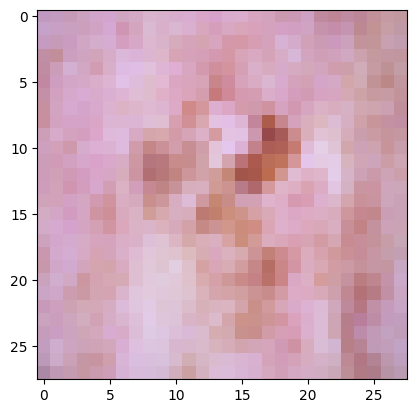

In [11]:
plt.imshow(X[0].reshape(28,28,3))

We display the first 100 images:

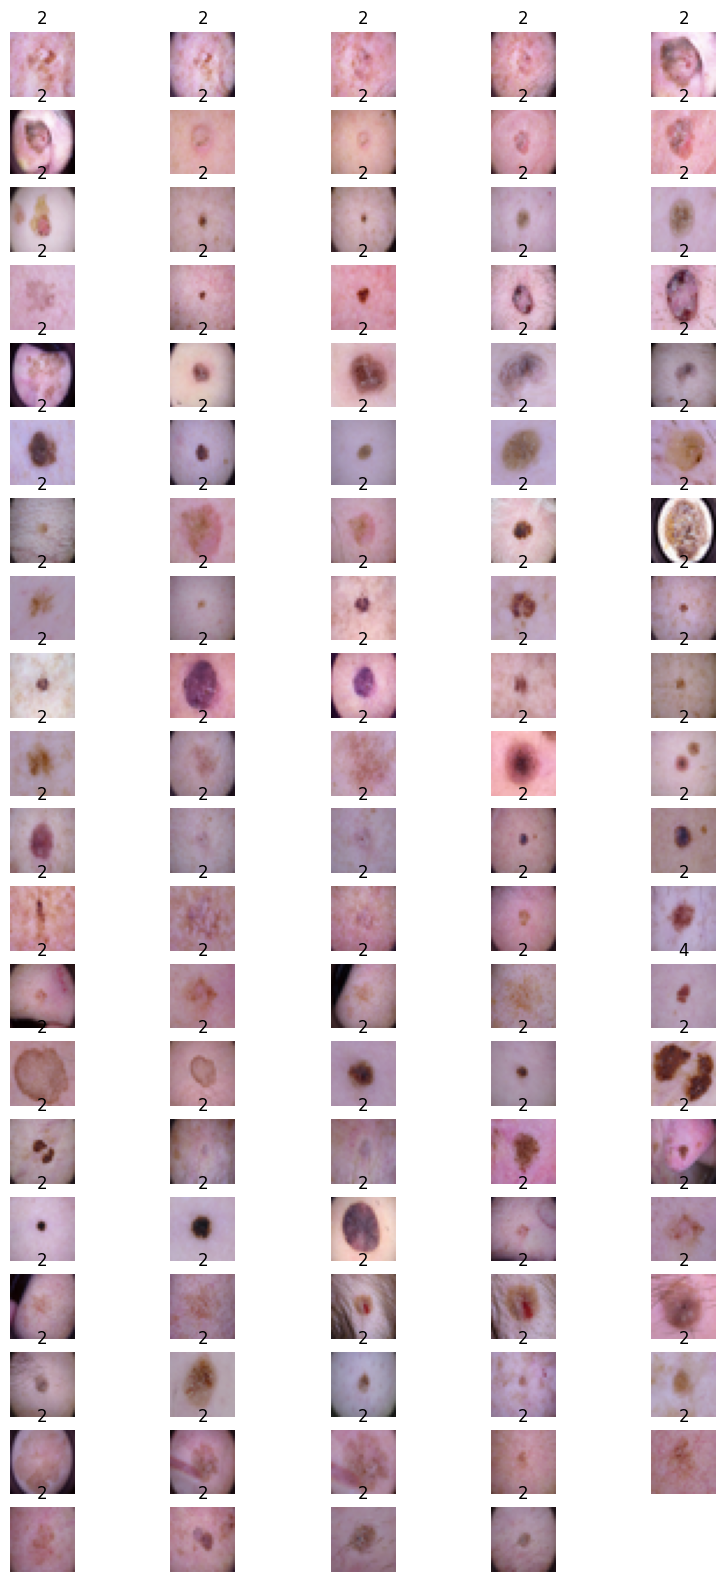

In [12]:
plt.figure(figsize=(10,20))
for i in range(0,99) :
    plt.subplot(20,5,i+1)
    plt.axis('off')
    plt.imshow(X[i].reshape(28,28,3))
    plt.title(y[i])

In [13]:
# Normalization between 0 and 1
X = X/255

We split into a training set and a validation set:

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [16]:
model = Sequential()
model.add(Dense(200, activation='relu'))
model.add(Dense(60, activation='relu'))
model.add(Dense(7, activation='softmax'))

In [17]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [18]:
# Training
train = model.fit(X_train , y_train , validation_data=(X_test,y_test), epochs=50, verbose=1)

Epoch 1/50
251/251 [==============================] - 2s 7ms/step - loss: 1.0727 - accuracy: 0.6624 - val_loss: 1.0975 - val_accuracy: 0.6585
Epoch 2/50
251/251 [==============================] - 2s 6ms/step - loss: 0.9844 - accuracy: 0.6656 - val_loss: 1.0190 - val_accuracy: 0.6610
Epoch 3/50
251/251 [==============================] - 2s 6ms/step - loss: 0.9582 - accuracy: 0.6721 - val_loss: 0.9862 - val_accuracy: 0.6615
Epoch 4/50
251/251 [==============================] - 2s 6ms/step - loss: 0.9346 - accuracy: 0.6765 - val_loss: 0.9573 - val_accuracy: 0.6630
Epoch 5/50
251/251 [==============================] - 2s 7ms/step - loss: 0.9220 - accuracy: 0.6750 - val_loss: 0.9357 - val_accuracy: 0.6655
Epoch 6/50
251/251 [==============================] - 2s 7ms/step - loss: 0.9109 - accuracy: 0.6789 - val_loss: 0.9815 - val_accuracy: 0.6635
Epoch 7/50
251/251 [==============================] - 2s 7ms/step - loss: 0.8989 - accuracy: 0.6831 - val_loss: 0.9146 - val_accuracy: 0.6745
Epoch 

In [19]:
# Test
model.evaluate(X_test,y_test)

63/63 [==============================] - 0s 1ms/step - loss: 0.7962 - accuracy: 0.7149


[0.7961504459381104, 0.714927613735199]

A function is defined to display a graph of the scores:

In [20]:
def plot_scores(train) :
    accuracy = train.history['accuracy']
    val_accuracy = train.history['val_accuracy']
    epochs = range(len(accuracy))
    plt.plot(epochs, accuracy, 'b', label='Score apprentissage')
    plt.plot(epochs, val_accuracy, 'r', label='Score validation')
    plt.title('Scores')
    plt.legend()
    plt.show()

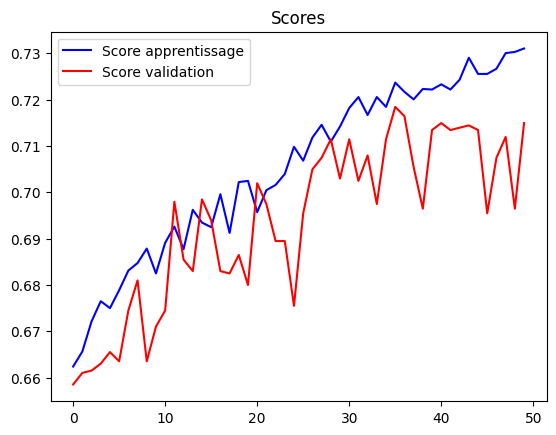

In [21]:
plot_scores(train)